In [2]:
import pandas as pd

df = pd.read_csv("house_price.csv")
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB
None
                   location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   

In [16]:
import pandas as pd

# Load the dataset
df = pd.read_csv("house_price.csv")

# Basic Info
print("Dataset Information:")
print(df.info())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Checking missing values
print("\nMissing Values:")
print(df.isnull().sum())

# First few rows
df.head()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB
None

Summary Statistics:
         total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000   

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


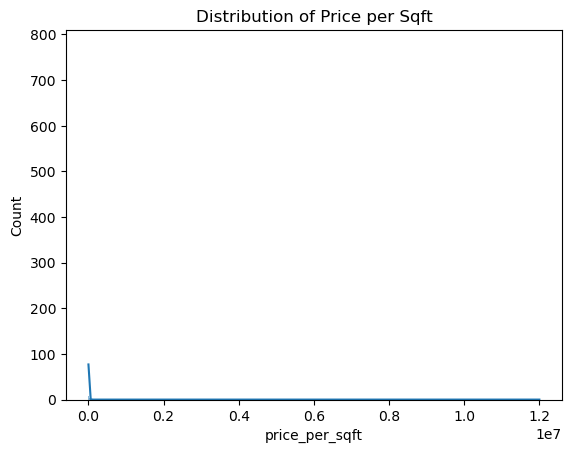

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['price_per_sqft'], kde=True)
plt.title("Distribution of Price per Sqft")
plt.show()

In [12]:
import numpy as np

# Calculate mean and standard deviation
mean = df['price_per_sqft'].mean()
std = df['price_per_sqft'].std()

# Define threshold (commonly 3 standard deviations)
lower_bound = mean - (3 * std)
upper_bound = mean + (3 * std)

# Filter out outliers
df_no_outliers_std = df[(df['price_per_sqft'] >= lower_bound) & (df['price_per_sqft'] <= upper_bound)]
print(f"Original dataset size: {df.shape[0]}, After removing outliers: {df_no_outliers_std.shape[0]}")

Original dataset size: 13200, After removing outliers: 13195


In [17]:
# Define percentile thresholds
lower_percentile = df['price_per_sqft'].quantile(0.01)
upper_percentile = df['price_per_sqft'].quantile(0.99)

# Filter data
df_no_outliers_percentile = df[(df['price_per_sqft'] >= lower_percentile) & (df['price_per_sqft'] <= upper_percentile)]
print(f"After Percentile-based outlier removal: {df_no_outliers_percentile.shape[0]}")

After Percentile-based outlier removal: 12941


In [18]:
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers_iqr = df[(df['price_per_sqft'] >= lower_bound) & (df['price_per_sqft'] <= upper_bound)]
print(f"After IQR-based outlier removal: {df_no_outliers_iqr.shape[0]}")

After IQR-based outlier removal: 11935


In [19]:
from scipy.stats import zscore

df['z_score'] = zscore(df['price_per_sqft'])

# Keep values where absolute z-score is less than 3
df_no_outliers_z = df[abs(df['z_score']) < 3]
print(f"After Z-Score outlier removal: {df_no_outliers_z.shape[0]}")


After Z-Score outlier removal: 13195


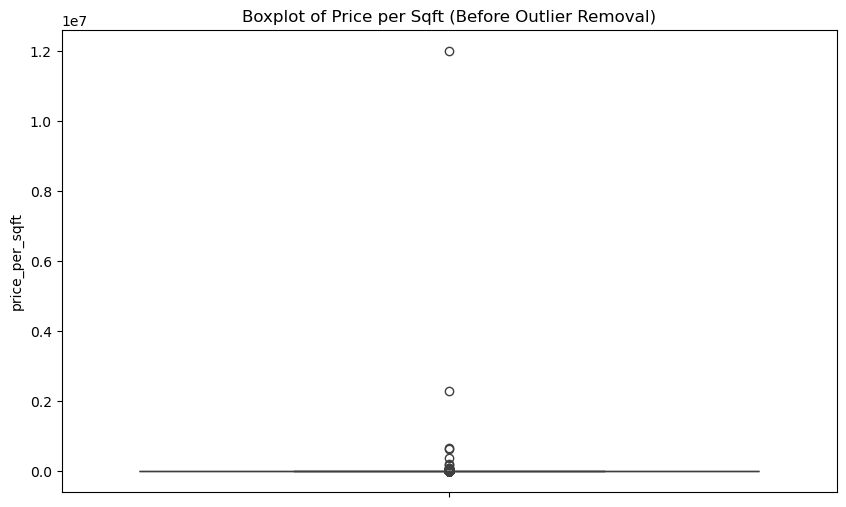

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(y=df["price_per_sqft"])
plt.title("Boxplot of Price per Sqft (Before Outlier Removal)")
plt.show()

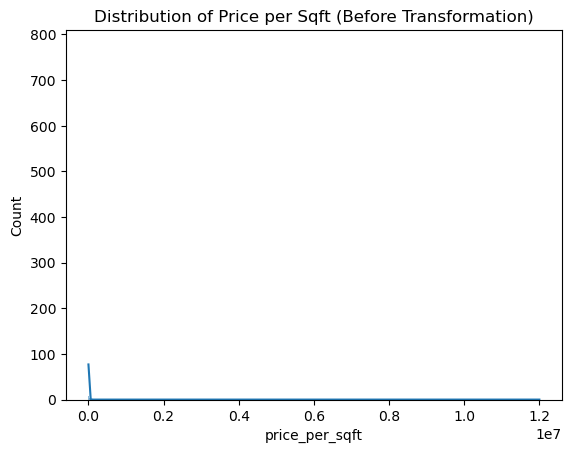

Skewness: 108.28105529705168
Kurtosis: 12095.21502832288


In [22]:
sns.histplot(df['price_per_sqft'], kde=True)
plt.title("Distribution of Price per Sqft (Before Transformation)")
plt.show()

# Checking skewness and kurtosis
print(f"Skewness: {df['price_per_sqft'].skew()}")
print(f"Kurtosis: {df['price_per_sqft'].kurt()}")

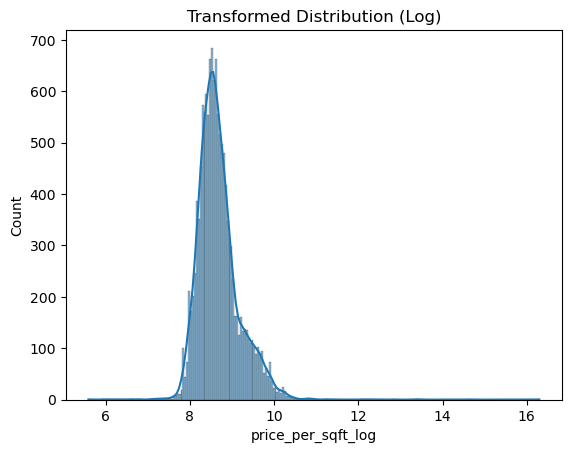

Skewness (after transformation): 1.4004850530059296
Kurtosis (after transformation): 9.206942162860814


In [23]:
df['price_per_sqft_log'] = np.log1p(df['price_per_sqft'])  # log1p avoids log(0) error

sns.histplot(df['price_per_sqft_log'], kde=True)
plt.title("Transformed Distribution (Log)")
plt.show()

print(f"Skewness (after transformation): {df['price_per_sqft_log'].skew()}")
print(f"Kurtosis (after transformation): {df['price_per_sqft_log'].kurt()}")

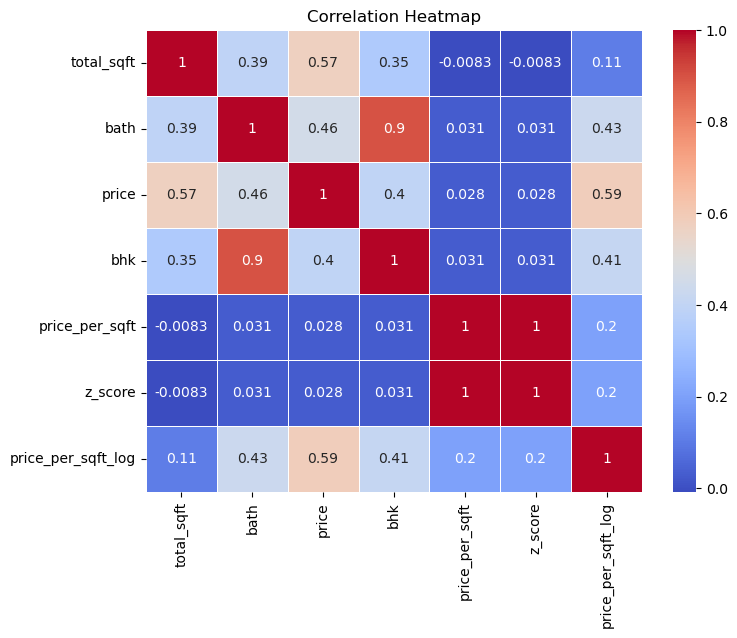

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

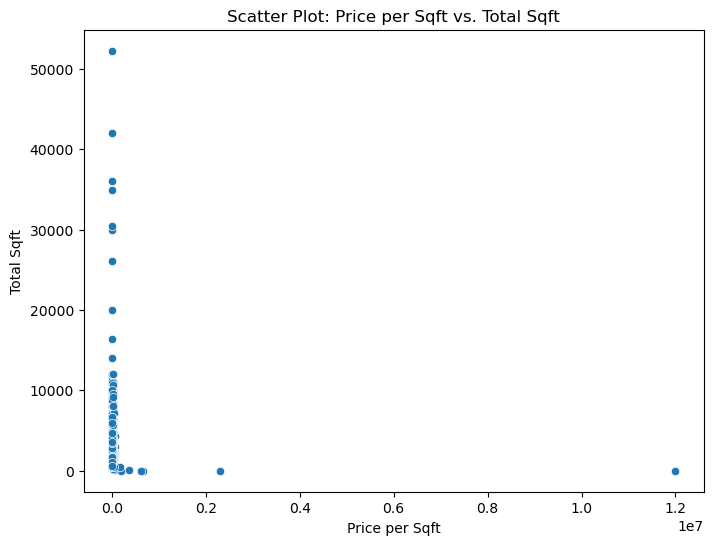

In [26]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['price_per_sqft'], y=df['total_sqft'])
plt.title("Scatter Plot: Price per Sqft vs. Total Sqft")
plt.xlabel("Price per Sqft")
plt.ylabel("Total Sqft")
plt.show()